# Imports and Reads

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import dct
from scipy.fft import idct
import os
import cv2
import sys

In [2]:
output_dir = 'compressed_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [3]:
with Image.open("/content/image1.png").convert('RGB') as img:
    img.save("/content/image1.bmp", format='BMP')
with Image.open("/content/image1.bmp") as img_bmp:
    img_array = np.array(img_bmp)
img_array.shape

(1080, 1920, 3)

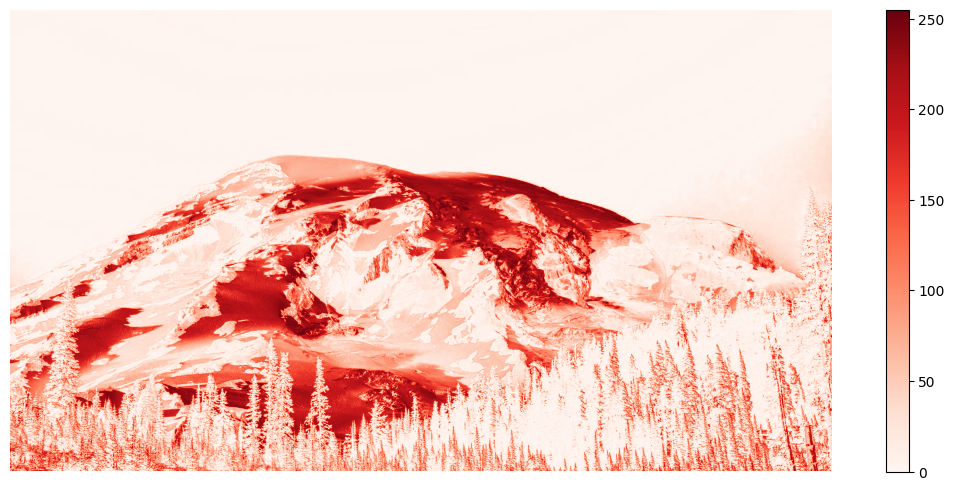

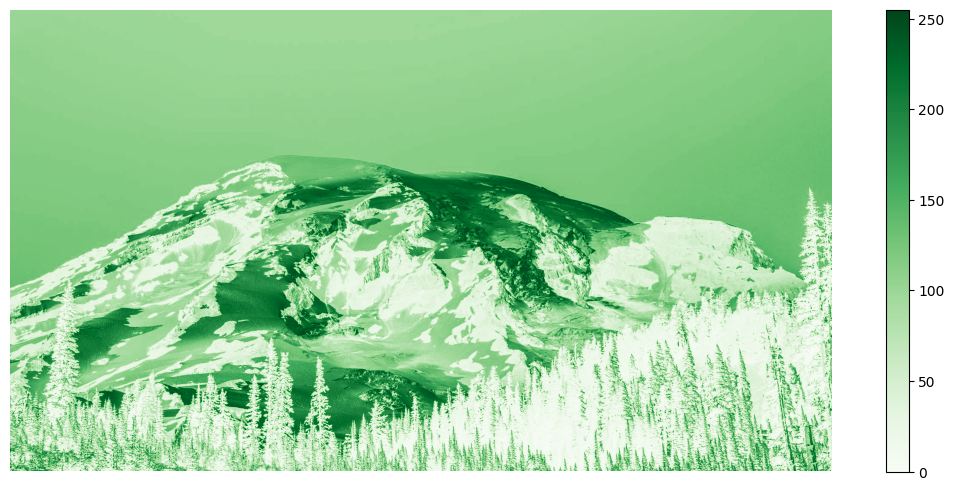

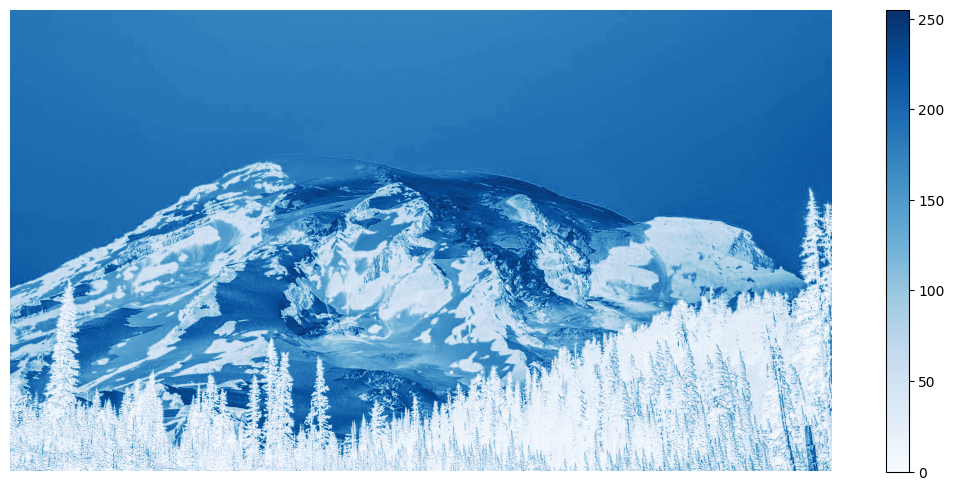

In [4]:
colors = ["Reds","Greens","Blues"]

for i in range(3):
    plt.figure(figsize=(14, 6))
    plt.imshow(img_array[:,:,i],cmap=colors[i])
    plt.axis("off")
    plt.colorbar()
    plt.savefig(f"a_{colors[i][:-1].lower()}.png")
    plt.show()

#Functions

In [5]:
def dct_compress(img_array, m):
    # Calculate the size of the compressed image array
    compressed_height = m * ((img_array.shape[0] + 7) // 8)
    compressed_width = m * ((img_array.shape[1] + 7) // 8)
    compressed_image = np.zeros((compressed_height, compressed_width, 3))

    # Process each color component in blocks of 8x8 pixels
    for i in range(0, img_array.shape[0], 8):
        for j in range(0, img_array.shape[1], 8):
            for channel in range(3):
                block = img_array[i:i+8, j:j+8, channel]
                # Apply 2D DCT
                dct_block = dct(dct(block, axis=0, norm='ortho'), axis=1, norm='ortho')
                # Retain only the top-left square of the DCT coefficients
                compressed_block = dct_block[:m, :m]
                compressed_image[m*(i//8):m*((i//8)+1),m*(j//8):m*((j//8)+1),channel] = compressed_block
    return compressed_image

In [6]:
def dct_decompress(compressed_image, m):
    # Initialize array for the decompressed image
    decompressed_height = ((compressed_image.shape[0] + m - 1) // m) * 8
    decompressed_width = ((compressed_image.shape[1] + m - 1) // m) * 8
    decompressed_image_array = np.zeros((decompressed_height, decompressed_width, 3))

    # Iterate over each block and each channel to decompress
    for i in range(0, compressed_image.shape[0],m):
        for j in range(0, compressed_image.shape[1],m):
            for channel in range(3):
                # Retrieve the compressed block
                compressed_block = compressed_image[i:i+m, j:j+m, channel]

                # Create a block of zeros with the same shape as the original block
                dct_block = np.zeros((8, 8))

                # Fill the top-left square of the block with the retained DCT coefficients
                dct_block[:m, :m] = compressed_block

                # Apply inverse 2D DCT
                idct_block = idct(idct(dct_block.T, norm='ortho').T, norm='ortho')

                # Assign the decompressed block to the corresponding part of the decompressed image
                decompressed_image_array[8*(i//m):8*((i//m)+1),8*(j//m):8*((j//m)+1), channel] = idct_block

    return decompressed_image_array.astype(np.uint8)

In [7]:
def display_image(image_array,m):
    plt.imshow(image_array)
    plt.axis('off')  # Turn off axis numbers
    plt.savefig(f"decompressed_image_{m}.png")
    plt.show()

In [8]:
def calculate_psnr(original_image, decompressed_image):
    max_pixel = 255.0  # Maximum pixel value for an 8-bit image

    # Calculate MSE
    mse = np.mean((original_image - decompressed_image) ** 2)

    if mse == 0:
        return float('inf')  # PSNR is infinite if MSE is zero

    # Calculate PSNR
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

#M--->4


In [9]:
m = 4
compressed_image_m_4 = dct_compress(img_array , m)
compressed_image_m_4

array([[[ 0.00000000e+00,  7.92000000e+02,  1.47200000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,

In [10]:
compressed_image_m_4_gray = cv2.cvtColor(compressed_image_m_4.astype(np.uint8), cv2.COLOR_BGR2GRAY)
cv2.imwrite(os.path.join(output_dir, f'compressed_image_m{m}.bmp'), compressed_image_m_4_gray)

True

In [11]:
original_size = img_array.size
compressed_size = compressed_image_m_4.size
print(f"Original size: {original_size} ")
print(f"Compressed size: {compressed_size} ")

Original size: 6220800 
Compressed size: 1555200 


In [12]:
decompressed_image_array_m_4 = dct_decompress(compressed_image_m_4,m)
decompressed_image_array_m_4

array([[[  0,  99, 184],
        [  0,  99, 184],
        [  0,  99, 184],
        ...,
        [  0, 114, 197],
        [  0, 114, 197],
        [  0, 114, 197]],

       [[  0,  99, 184],
        [  0,  99, 184],
        [  0,  99, 184],
        ...,
        [  0, 114, 197],
        [  0, 114, 197],
        [  0, 114, 197]],

       [[  0,  99, 184],
        [  0,  99, 184],
        [  0,  99, 184],
        ...,
        [  0, 114, 197],
        [  0, 114, 197],
        [  0, 114, 197]],

       ...,

       [[130, 144,  81],
        [122, 135,  79],
        [125, 137,  86],
        ...,
        [ 58,  65,  75],
        [ 27,  36,  47],
        [  8,  18,  31]],

       [[156, 169, 109],
        [104, 116,  71],
        [ 62,  74,  39],
        ...,
        [ 95, 102, 112],
        [ 34,  43,  54],
        [250,   3,  16]],

       [[157, 169, 114],
        [ 71,  83,  48],
        [251,   5, 241],
        ...,
        [120, 127, 137],
        [ 37,  46,  58],
        [236, 246,   1]]

In [13]:
decompressed_image_array_m_4.size

6220800

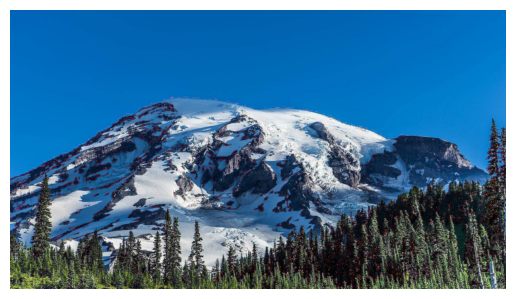

In [14]:
display_image(decompressed_image_array_m_4,m)

In [15]:
psnr_m_4 = calculate_psnr(img_array,decompressed_image_array_m_4)
print(f"PSNR for m=4: {psnr_m_4:.2f} dB")

PSNR for m=4: 33.21 dB


#M--->3

In [16]:
m = 3
compressed_image_m_3 = dct_compress(img_array , m)
compressed_image_m_3

array([[[ 0.00000000e+00,  7.92000000e+02,  1.47200000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  9.12000000e+02,  1.57600000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,

In [17]:
compressed_image_m_3_gray = cv2.cvtColor(compressed_image_m_3.astype(np.uint8), cv2.COLOR_BGR2GRAY)
cv2.imwrite(os.path.join(output_dir, f'compressed_image_m{m}.bmp'), compressed_image_m_3_gray)

True

In [18]:
original_size = img_array.size
compressed_size = compressed_image_m_3.size
print(f"Original size: {original_size} ")
print(f"Compressed size: {compressed_size} ")

Original size: 6220800 
Compressed size: 874800 


In [19]:
decompressed_image_array_m_3 = dct_decompress(compressed_image_m_3,m)
decompressed_image_array_m_3

array([[[  0,  99, 184],
        [  0,  99, 184],
        [  0,  99, 184],
        ...,
        [  0, 114, 197],
        [  0, 114, 197],
        [  0, 114, 197]],

       [[  0,  99, 184],
        [  0,  99, 184],
        [  0,  99, 184],
        ...,
        [  0, 114, 197],
        [  0, 114, 197],
        [  0, 114, 197]],

       [[  0,  99, 184],
        [  0,  99, 184],
        [  0,  99, 184],
        ...,
        [  0, 114, 197],
        [  0, 114, 197],
        [  0, 114, 197]],

       ...,

       [[ 81,  94,  46],
        [ 81,  93,  46],
        [ 83,  96,  46],
        ...,
        [ 57,  61,  73],
        [ 24,  32,  44],
        [  1,  12,  24]],

       [[113, 125,  77],
        [104, 116,  70],
        [ 94, 107,  60],
        ...,
        [ 99, 104, 115],
        [ 34,  42,  54],
        [245,   0,  11]],

       [[136, 147, 100],
        [121, 133,  87],
        [102, 114,  69],
        ...,
        [127, 132, 143],
        [ 41,  50,  62],
        [237, 248,   3]]

In [20]:
decompressed_image_array_m_3.size

6220800

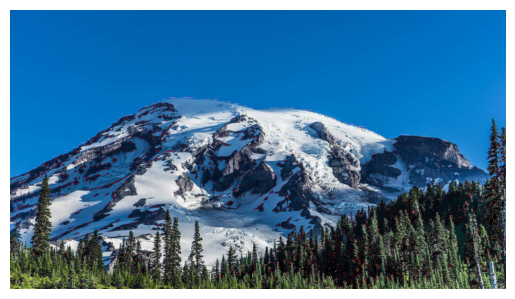

In [21]:
display_image(decompressed_image_array_m_3,m)

In [22]:
psnr_m_3 = calculate_psnr(img_array,decompressed_image_array_m_3)
print(f"PSNR for m=3: {psnr_m_3:.2f} dB")

PSNR for m=3: 32.57 dB


#M--->2

In [23]:
m = 2
compressed_image_m_2 = dct_compress(img_array , m)
compressed_image_m_2

array([[[ 0.00000000e+00,  7.92000000e+02,  1.47200000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  7.92000000e+02,  1.47200000e+03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  9.12000000e+02,  1.57600000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 1.60000000e+01,  8.08000000e+02,  1.48800000e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.60000000e+01,  8.08000000e+02,  1.48800000e+03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,

In [24]:
compressed_image_m_2_gray = cv2.cvtColor(compressed_image_m_2.astype(np.uint8), cv2.COLOR_BGR2GRAY)
cv2.imwrite(os.path.join(output_dir, f'compressed_image_m{m}.bmp'), compressed_image_m_2_gray)

True

In [25]:
original_size = img_array.size
compressed_size = compressed_image_m_2.size
print(f"Original size: {original_size} ")
print(f"Compressed size: {compressed_size} ")

Original size: 6220800 
Compressed size: 388800 


In [26]:
decompressed_image_array_m_2 = dct_decompress(compressed_image_m_2,m)
decompressed_image_array_m_2

array([[[  0,  99, 184],
        [  0,  99, 184],
        [  0,  99, 184],
        ...,
        [  0, 114, 197],
        [  0, 114, 197],
        [  0, 114, 197]],

       [[  0,  99, 184],
        [  0,  99, 184],
        [  0,  99, 184],
        ...,
        [  0, 114, 197],
        [  0, 114, 197],
        [  0, 114, 197]],

       [[  0,  99, 184],
        [  0,  99, 184],
        [  0,  99, 184],
        ...,
        [  0, 114, 197],
        [  0, 114, 197],
        [  0, 114, 197]],

       ...,

       [[ 80,  92,  51],
        [ 86,  99,  53],
        [ 98, 111,  57],
        ...,
        [ 52,  59,  69],
        [ 48,  55,  68],
        [ 46,  52,  67]],

       [[ 72,  83,  49],
        [ 81,  93,  52],
        [ 97, 110,  59],
        ...,
        [ 58,  64,  75],
        [ 55,  61,  75],
        [ 54,  60,  75]],

       [[ 68,  79,  47],
        [ 78,  89,  52],
        [ 96, 109,  59],
        ...,
        [ 61,  67,  78],
        [ 59,  65,  79],
        [ 58,  64,  79]]

In [27]:
decompressed_image_array_m_2.size

6220800

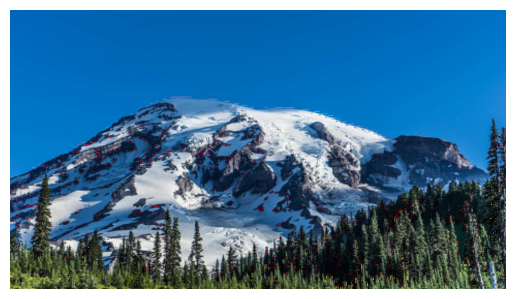

In [28]:
display_image(decompressed_image_array_m_2,m)

In [29]:
psnr_m_2 = calculate_psnr(img_array,decompressed_image_array_m_2)
print(f"PSNR for m=2: {psnr_m_2:.2f} dB")

PSNR for m=2: 32.08 dB


#M--->1

In [30]:
m = 1
compressed_image_m_1 = dct_compress(img_array , m)
compressed_image_m_1

array([[[   0.   ,  792.   , 1472.   ],
        [   0.   ,  792.   , 1472.   ],
        [   0.   ,  792.   , 1472.   ],
        ...,
        [   0.   ,  912.   , 1576.   ],
        [   0.   ,  912.   , 1576.   ],
        [   0.   ,  912.   , 1576.   ]],

       [[  16.   ,  808.   , 1488.   ],
        [  16.   ,  808.   , 1488.   ],
        [  16.   ,  808.   , 1488.   ],
        ...,
        [   0.   ,  912.   , 1576.   ],
        [   0.   ,  912.   , 1576.   ],
        [   0.   ,  912.   , 1576.   ]],

       [[   8.   ,  808.   , 1488.   ],
        [   8.   ,  808.   , 1488.   ],
        [   8.   ,  808.   , 1488.   ],
        ...,
        [   0.   ,  912.   , 1576.   ],
        [   0.   ,  912.   , 1576.   ],
        [   0.   ,  912.   , 1576.   ]],

       ...,

       [[ 702.75 ,  850.5  ,  343.625],
        [ 400.125,  501.375,  258.   ],
        [ 645.5  ,  763.125,  384.5  ],
        ...,
        [ 707.875,  807.375,  709.125],
        [ 612.125,  770.625,  727.625],
        [

In [31]:
compressed_image_m_1_gray = cv2.cvtColor(compressed_image_m_1.astype(np.uint8), cv2.COLOR_BGR2GRAY)
cv2.imwrite(os.path.join(output_dir, f'compressed_image_m{m}.bmp'), compressed_image_m_1_gray)

True

In [32]:
original_size = img_array.size
compressed_size = compressed_image_m_1.size
print(f"Original size: {original_size} ")
print(f"Compressed size: {compressed_size} ")

Original size: 6220800 
Compressed size: 97200 


In [33]:
decompressed_image_array_m_1 = dct_decompress(compressed_image_m_1,m)
decompressed_image_array_m_1

array([[[  0,  99, 184],
        [  0,  99, 184],
        [  0,  99, 184],
        ...,
        [  0, 114, 197],
        [  0, 114, 197],
        [  0, 114, 197]],

       [[  0,  99, 184],
        [  0,  99, 184],
        [  0,  99, 184],
        ...,
        [  0, 114, 197],
        [  0, 114, 197],
        [  0, 114, 197]],

       [[  0,  99, 184],
        [  0,  99, 184],
        [  0,  99, 184],
        ...,
        [  0, 114, 197],
        [  0, 114, 197],
        [  0, 114, 197]],

       ...,

       [[106, 122,  55],
        [106, 122,  55],
        [106, 122,  55],
        ...,
        [ 56,  65,  67],
        [ 56,  65,  67],
        [ 56,  65,  67]],

       [[106, 122,  55],
        [106, 122,  55],
        [106, 122,  55],
        ...,
        [ 56,  65,  67],
        [ 56,  65,  67],
        [ 56,  65,  67]],

       [[106, 122,  55],
        [106, 122,  55],
        [106, 122,  55],
        ...,
        [ 56,  65,  67],
        [ 56,  65,  67],
        [ 56,  65,  67]]

In [34]:
decompressed_image_array_m_1.size

6220800

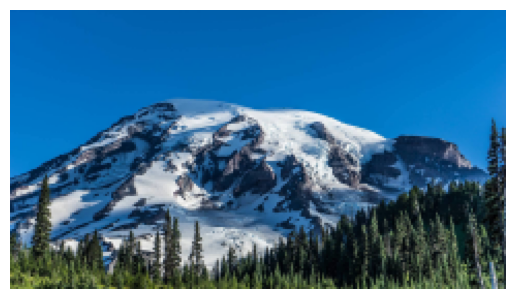

In [35]:
display_image(decompressed_image_array_m_1,m)

In [36]:
psnr_m_1 = calculate_psnr(img_array,decompressed_image_array_m_1)
print(f"PSNR for m=1: {psnr_m_1:.2f} dB")

PSNR for m=1: 31.51 dB


# Results

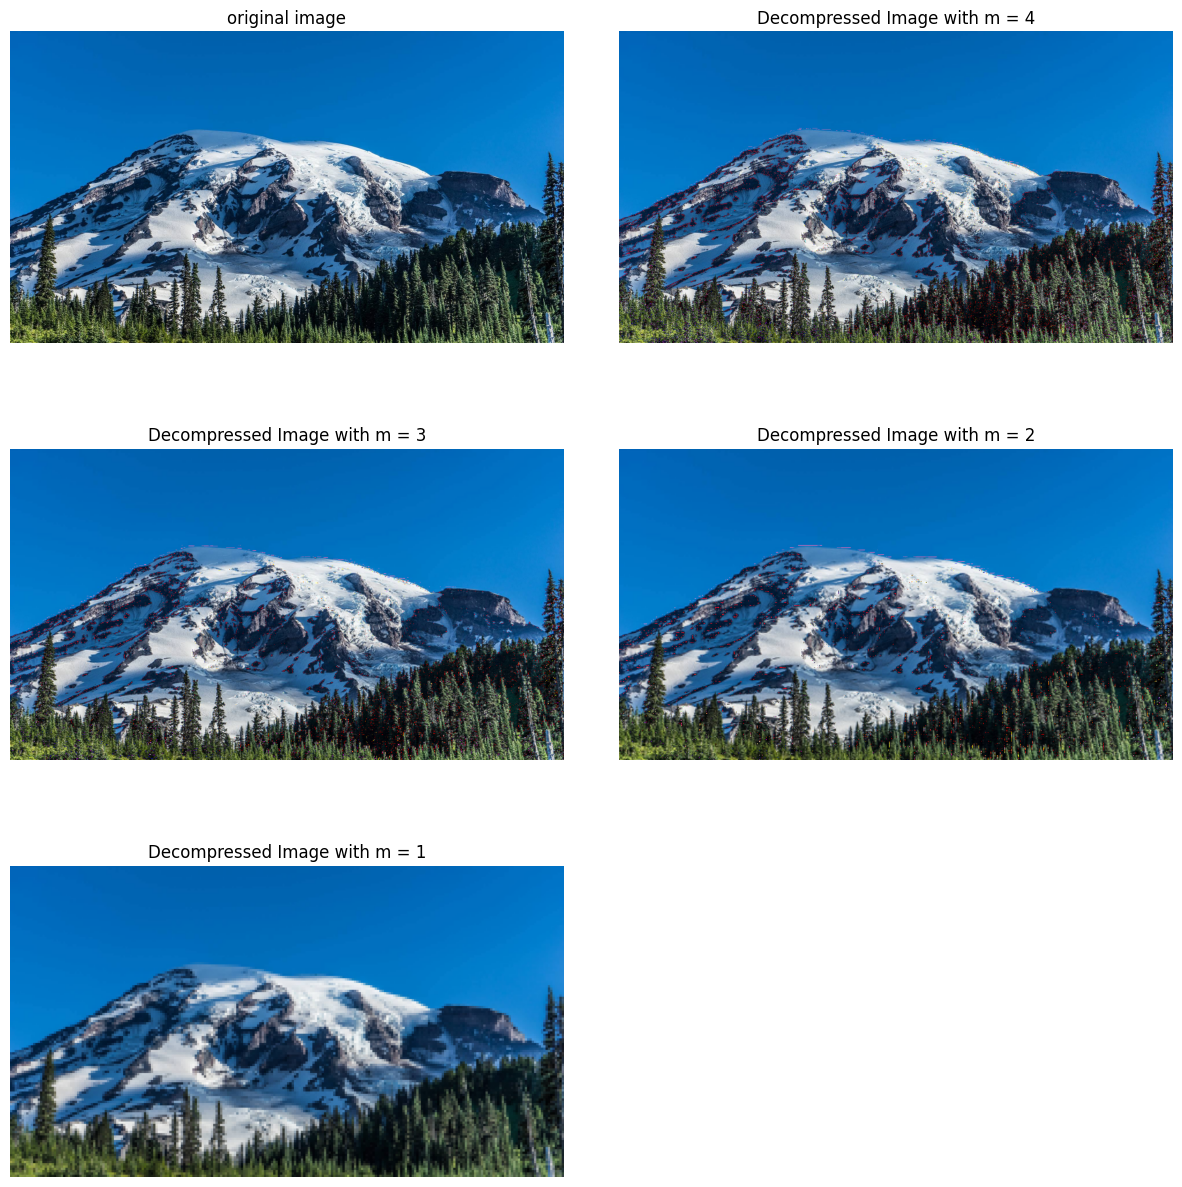

In [37]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # Create a figure with 3 rows and 2 columns
fig.subplots_adjust(hspace=0.3, wspace=0.1)  # Adjust the horizontal and vertical spacing between subplots

# Display the first two images in the first row
axs[0, 0].imshow(img_array)
axs[0, 0].set_title('original image')
axs[0, 0].axis('off')

axs[0, 1].imshow(decompressed_image_array_m_4)
axs[0, 1].set_title('Decompressed Image with m = 4')
axs[0, 1].axis('off')

# Display the next two images in the second row
axs[1, 0].imshow(decompressed_image_array_m_3)
axs[1, 0].set_title('Decompressed Image with m = 3')
axs[1, 0].axis('off')

axs[1, 1].imshow(decompressed_image_array_m_2)
axs[1, 1].set_title('Decompressed Image with m = 2')
axs[1, 1].axis('off')

# Display the last image in the third row
axs[2, 0].imshow(decompressed_image_array_m_1)
axs[2, 0].set_title('Decompressed Image with m = 1')
axs[2, 0].axis('off')

# Remove the empty subplot in the last column of the third row
fig.delaxes(axs[2, 1])

plt.show()

In [38]:
print(f"PSNR for m=4: {psnr_m_4:.2f} dB")
print(f"PSNR for m=3: {psnr_m_3:.2f} dB")
print(f"PSNR for m=2: {psnr_m_2:.2f} dB")
print(f"PSNR for m=1: {psnr_m_1:.2f} dB")

PSNR for m=4: 33.21 dB
PSNR for m=3: 32.57 dB
PSNR for m=2: 32.08 dB
PSNR for m=1: 31.51 dB
